<a href="https://colab.research.google.com/github/abayro125/Quantum/blob/main/Basics_of_Quantum_Information_Single_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Classical states and probability vectors

Suppose that we have a system that stores information. More specifically, we will assume that this system can be in one of a finite number of classical states at each instant. Here, the term classical state should be understood in intuitive terms, as a configuration that can be recognized and described unambiguously.

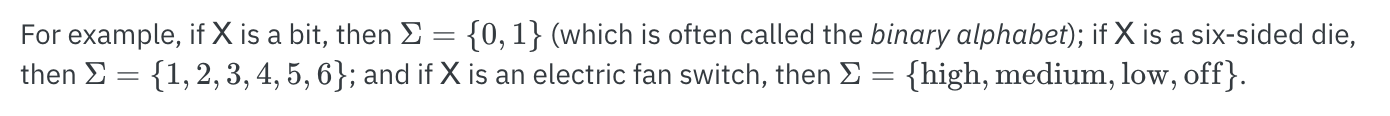

When thinking about X as a carrier of information, where the different classical states of X could have different interpretations or lead to different outcomes or consequences, it may be sufficient to describe  as simply being in one of its possible classical states. For instance, if X is a fan switch, we might happen to know with certainty that it is set to high. Often in information processing, however, our knowledge of X is uncertain, and we represent our knowledge of the classical state of X by assigning probabilities to each classical state, resulting in a probabilistic state.

For example, suppose X is a bit. Based on what we know or expect about what has happened to X in the past, perhaps we believe that X is in the classical state 0 with probability 3/4 and in the state 1 with probability 1/4 We may represent such a belief by writing this:
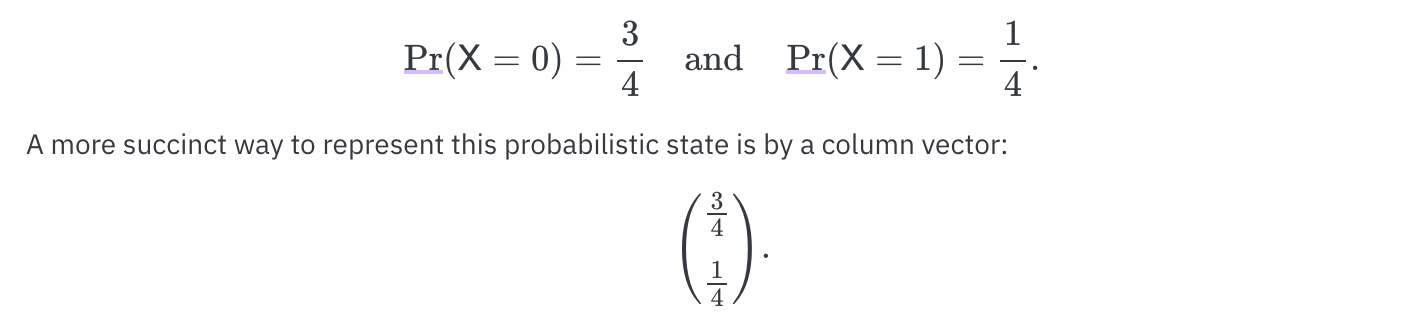

To be precise, we can represent any probabilistic state through a column vector satisfying two properties:

1. All entries of the vector are nonnegative real numbers.
2. The sum of the entries is equal to 1

1.2 Measuring classical states

Measurement changes our knowledge of the system, and therefore changes the probabilistic state that we associate with that system: if we recognize that  X is in the classical state a e sigma, then the new probability vector representing our knowledge of X becomes a vector having a 1 in the entry corresponding to a and 0 for all other entries. This vector indicates that X is in the classical state a with certainty, which we know having just recognized it.

We denote the vector just described, meaning the vector having a 1 in the entry corresponding to a and 0 for all other entries, by |a>  This vector is read as "ket a" for a reason that will be explained later. Vectors of this sort are also called standard basis vectors.
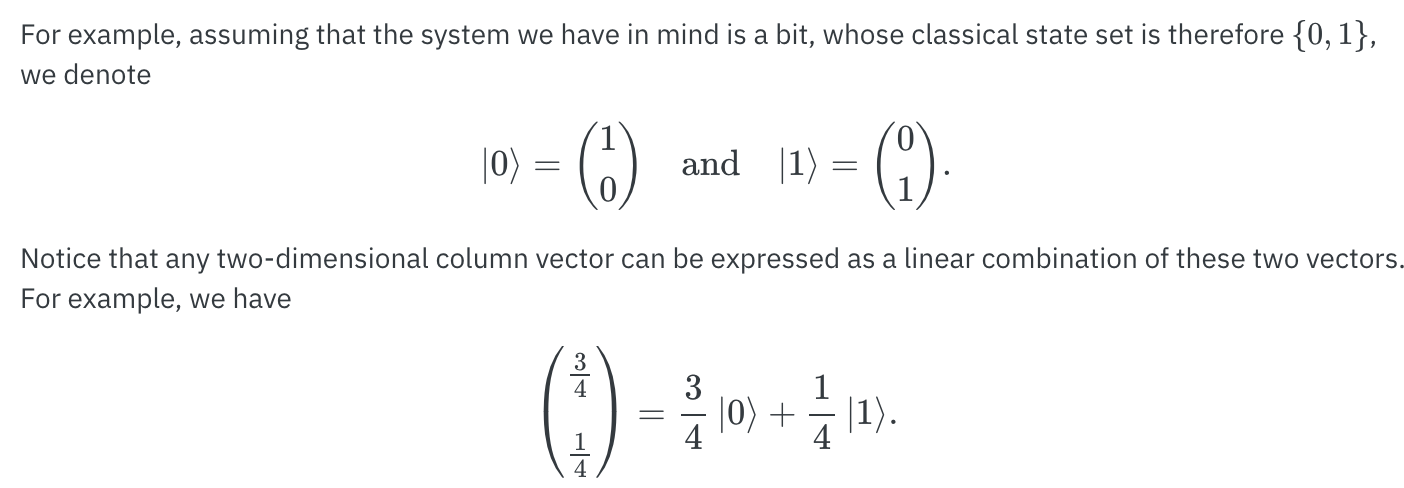

1.3 Classsical operations

Deterministic Operations: Each classical state is transformed into f(a) for some function 

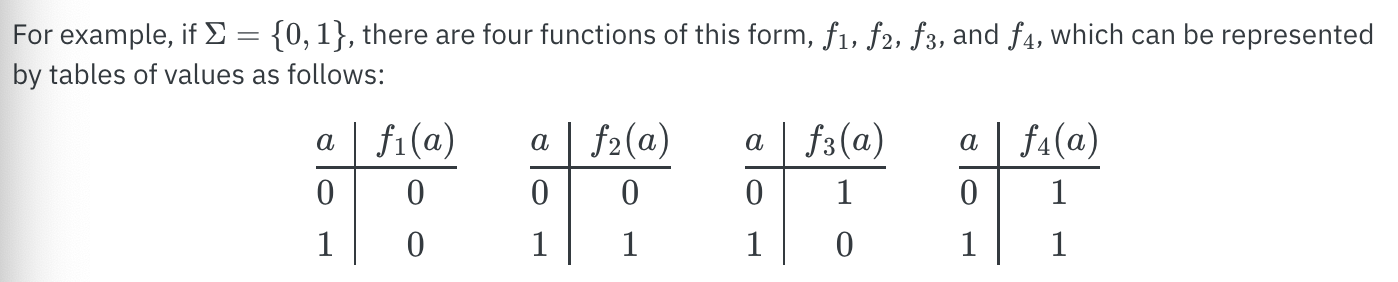



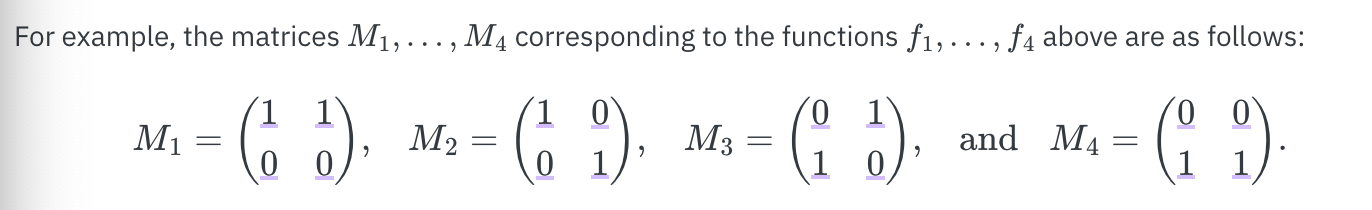

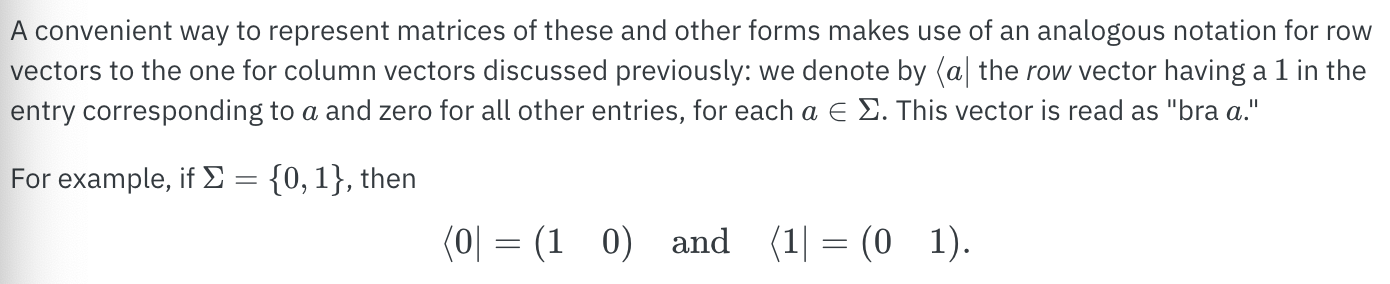

Probabilisitc operations and stochastic matrices

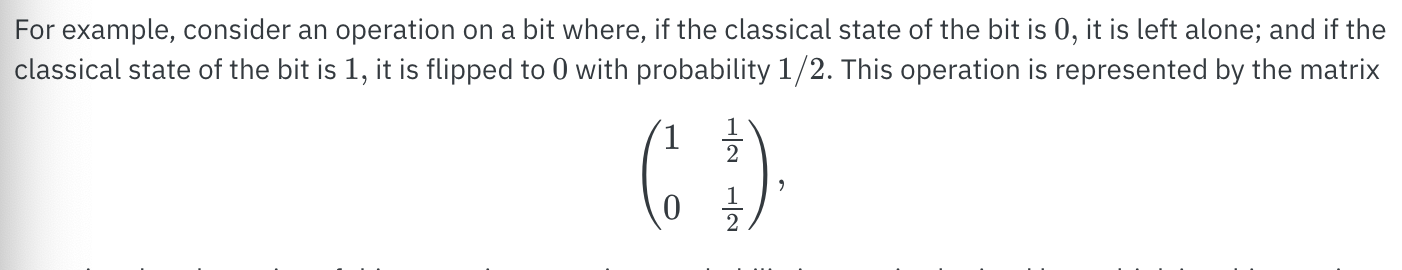

We can describe the set of all probabilistic operations in mathematical terms as those that are represented by stochastic matrices, which are matrics that satisfy these two properities:

1) All entries are nonnegative real numbers

2) The entries in every column sum to 1


2. Quantum Information

2.1 Quantum state vectors
A quantum state of a system is represented by a column vector in a similar way to the representation of probabilistic states by vectors, including the assumption that the indices of the vector are placed in correspondence with the classical state set of the system being considered.

Vectors representing quantum information are characterized by these two properties:

1. The entires of the quantum state vector are complex numbers
2. The sum of the absolute values squared of the entries of a quantum state vector must equal 1

The term qubit refers to a sysem whose classical states is {0,1} and that can be a quantum state. 

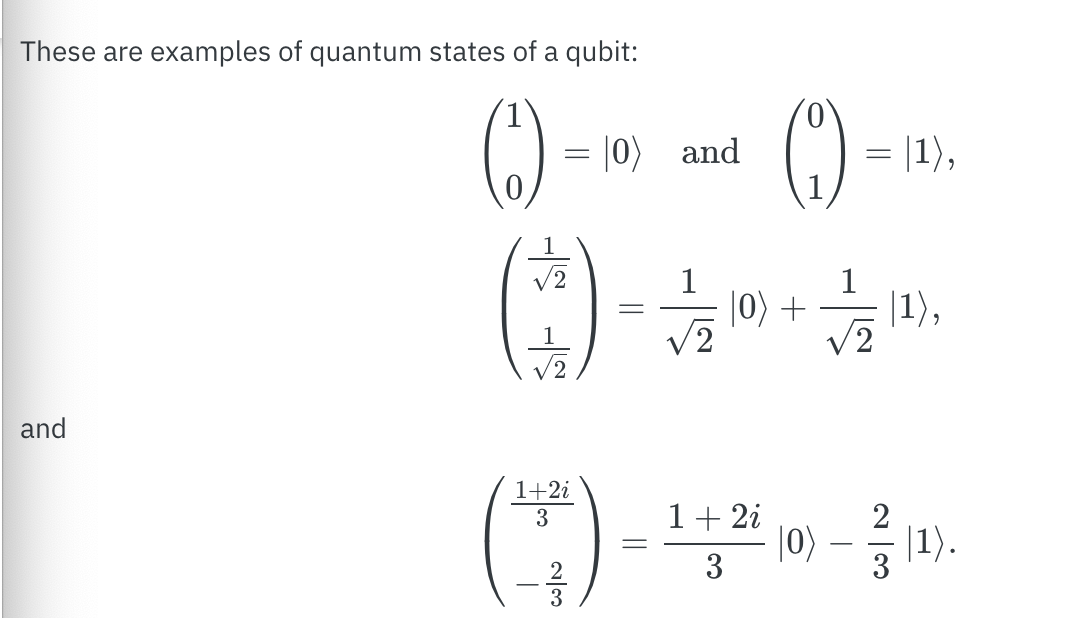

Quantum states of other systems

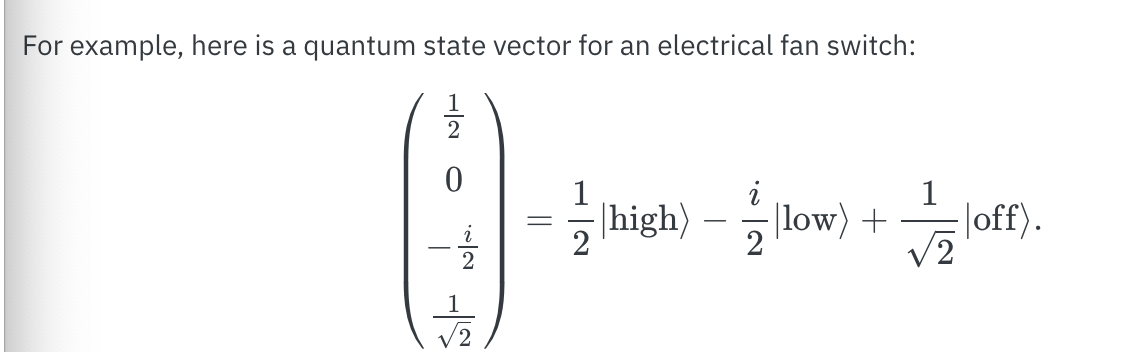

2.2 Measuring quantum states

Similar to the probabilistic setting, when a system in a quantum state is measured, the observer performing the measurement won't see a quantum state vector, but rather the result will be a classical state. In this sense, measurements act as the interface between quantum and classical information, through which classical information is extracted from quantum states.

The rule is simple: if a quantum state is measured, each classical state of the system results with probability equal to the absolute value squared of the entry in the quantum state vector corresponding to that classical state. (This is known as the Born rule in quantum mechanics.) Notice that this rule is consistent with the requirement that the absolute values squared of the entries in a quantum state vector sum to 1, as it implies that the probabilities of different classical state measurement outcomes sum to 1.

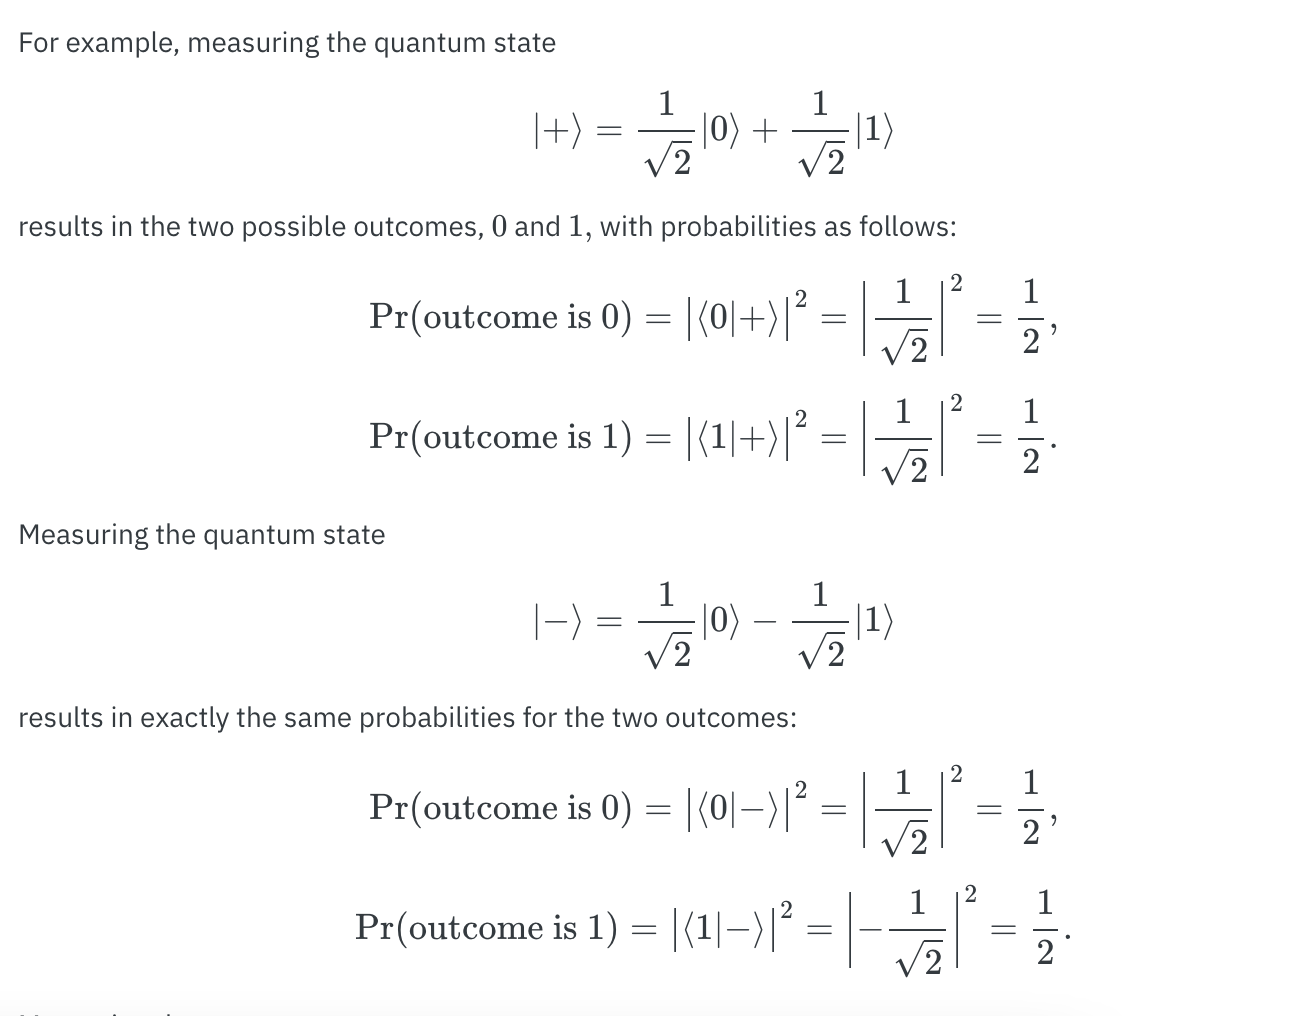

2.3 Unitary operations

Thus far it may not be evident why quantum information is fundamentally different from classical information. That is, when a quantum state is measured, the probability to obtain each classical state is given by the absolute value squared of the corresponding vector entry — so why not simply record these probabilities in a probability vector?

The answer, at least in part, is that the set of allowable operations that can be performed on a quantum state is different than it is for classical information. Similar to the probabilistic setting, operations on quantum states are linear mappings — but rather than being represented by stochastic matrices as in the classical case, operations on quantum state vectors are represented by unitary matrices.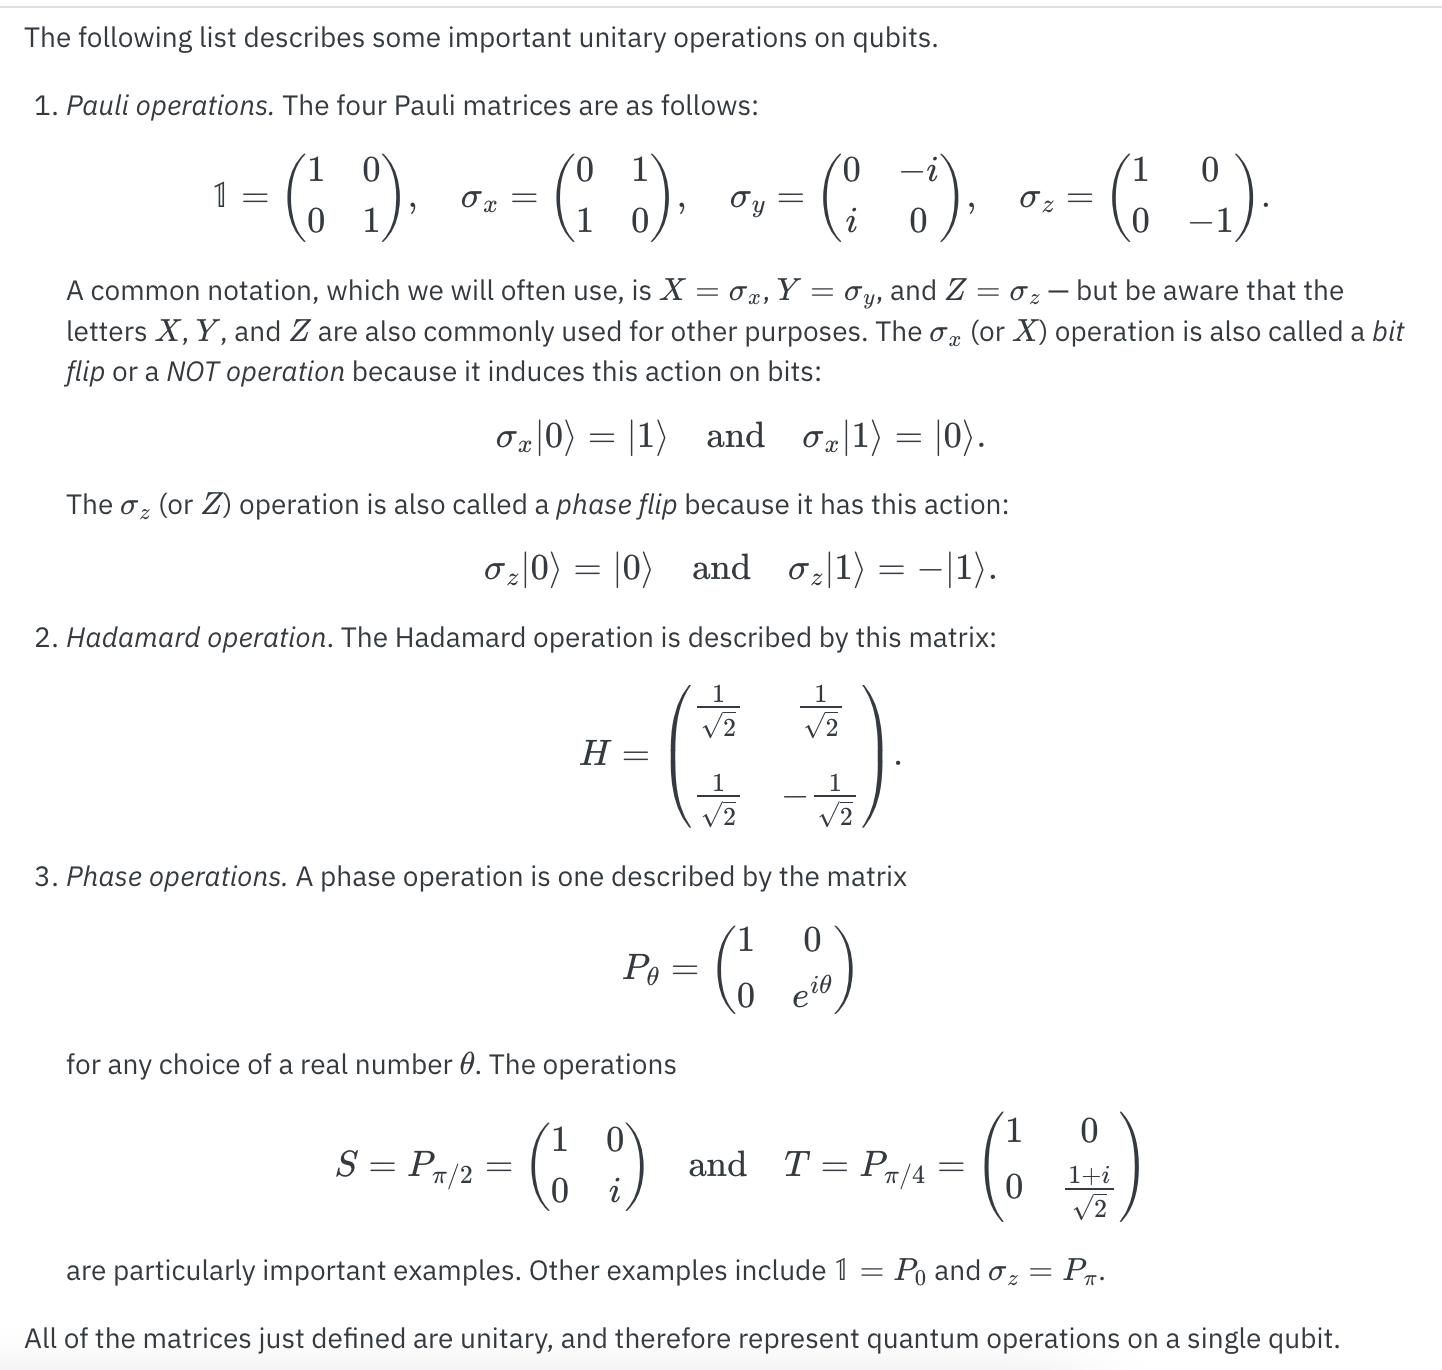

In [ ]:
from numpy import array

ket0 = array([1, 0]) #qubit state 0
ket1 = array([0, 1]) #qubit state 1

display(ket0/2 + ket1/2) #shows the average value of the sum



array([0.5, 0.5])

In [ ]:
M1 = array([ [1, 1], [0, 0] ]) #matrix 1
M2 = array([ [1, 1], [1, 0] ]) #matrix 2

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

In [ ]:
from numpy import matmul

display(matmul(M1,ket1)) #matmul performs matrix multiplication
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [ ]:

from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, and w have been defined.")


display(u.draw('latex'))
display(v.draw('text'))

State vectors u, v, and w have been defined.


<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [ ]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [ ]:
v = Statevector([(1+2.j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
v.measure()

('0', Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 559, '1': 441}

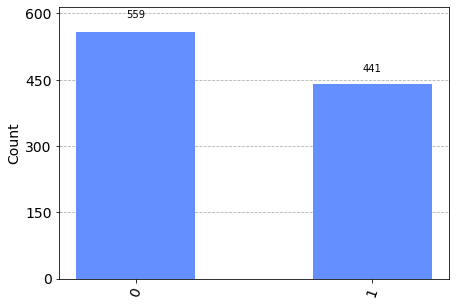

In [ ]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [ ]:
from qiskit.quantum_info import Operator

X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

v = Statevector([1,0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw() #draws the circuit

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [ ]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

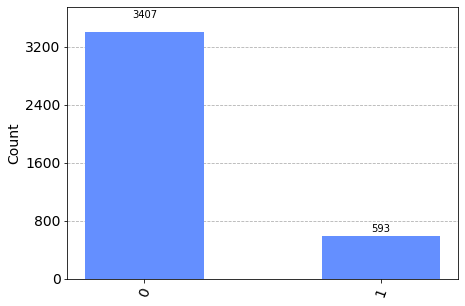

In [ ]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)